In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
df= pd.read_csv("phishing_site_urls.csv")
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
df.shape

(549346, 2)

## There is Unbalance in the data

<BarContainer object of 2 artists>

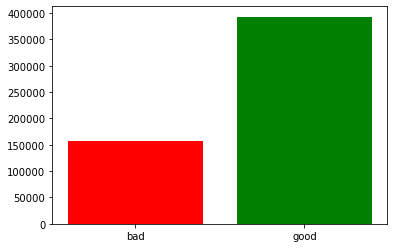

In [4]:
x=df.Label.unique()
x
y=np.array([df[df['Label']=='bad'].count()[0],df[df['Label']=='good'].count()[0]])
y

plt.bar(x,y,color=[ 'red', 'green'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


## There is no nulls in the dataset

In [6]:
df.isna().sum()

URL      0
Label    0
dtype: int64

## Check and remove duplicates

In [7]:
df.URL.duplicated().sum()

42151

In [8]:
df.drop(df[df.URL.duplicated() == True].index, axis = 0, inplace = True)
df.reset_index(drop=True)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
507190,23.227.196.215/,bad
507191,apple-checker.org/,bad
507192,apple-iclods.org/,bad
507193,apple-uptoday.org/,bad


## Handling StopWords

In [9]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))
sw=list(set(stopwords.words("english")))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
df['clean_url']=df.URL.astype(str)
#df['clean_url']=df['clean_url'].apply(lambda x:" ".join([word for word in x.split() if word not in sw]))
df.head()

,URL,Label,clean_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,mail.printakid.com/www.online.americanexpress....,bad,mail.printakid.com/www.online.americanexpress....
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydregs.com/wp-content/themes/widescre...


In [11]:
df.URL.duplicated().sum()

0

## Take only the Alphabets

In [12]:
tok= RegexpTokenizer(r'[A-Za-z0-9]+')

In [37]:
df.URL[1]

'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php'

In [13]:
tok.tokenize(df.URL[1])

['www',
 'dghjdgf',
 'com',
 'paypal',
 'co',
 'uk',
 'cycgi',
 'bin',
 'webscrcmd',
 'home',
 'customer',
 'nav',
 '1',
 'loading',
 'php']

In [14]:
df.clean_url=df.clean_url.map(lambda x: tok.tokenize(x))

In [15]:
df.head()

,URL,Label,clean_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [16]:
#df['clean_url2']=df.URL.astype(str)
#df['clean_url2']=df['clean_url'].apply(lambda x:" ".join([word for word in x if word not in sw]))

In [16]:
df.head()

,URL,Label,clean_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


## Word Lemmtization

In [17]:
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()
df['lem_url'] = df['clean_url'].map(lambda x: [wnl.lemmatize(word) for word in x])
df.head()

[nltk_data] Downloading package omw-1.4 to /Users/qifanwu/nltk_data...


,URL,Label,clean_url,lem_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737...","[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydregs, com, wp, content, theme, wid..."


In [42]:
i = 4
print(df['clean_url'].iloc[i])
print(df['lem_url'].iloc[i])

['thewhiskeydregs', 'com', 'wp', 'content', 'themes', 'widescreen', 'includes', 'temp', 'promocoessmiles', '84784787824HDJNDJDSJSHD', '2724782784']
['thewhiskeydregs', 'com', 'wp', 'content', 'theme', 'widescreen', 'includes', 'temp', 'promocoessmiles', '84784787824HDJNDJDSJSHD', '2724782784']


In [18]:
df.isna().sum()

URL          0
Label        0
clean_url    0
lem_url      0
dtype: int64

## Vectorizing using TFIDF

In [46]:
df_train, df_test = train_test_split(df, random_state=42,test_size=0.2,shuffle=True)
df_train

,URL,Label,clean_url,lem_url
399775,myspace.com/kinsmanredeemer69,good,"[myspace, com, kinsmanredeemer69]","[myspace, com, kinsmanredeemer69]"
57714,www.cityoflaredo.com/airport/,good,"[www, cityoflaredo, com, airport]","[www, cityoflaredo, com, airport]"
80839,www.cs.umb.edu/~laur/ARMiner/,good,"[www, cs, umb, edu, laur, ARMiner]","[www, c, umb, edu, laur, ARMiner]"
359375,imdb.com/name/nm1027430/bio,good,"[imdb, com, name, nm1027430, bio]","[imdb, com, name, nm1027430, bio]"
428999,seatplans.com/airlines/Air-Transat,good,"[seatplans, com, airlines, Air, Transat]","[seatplans, com, airline, Air, Transat]"
...,...,...,...,...
264961,192.com/atoz/people/harrison/miriam/,good,"[192, com, atoz, people, harrison, miriam]","[192, com, atoz, people, harrison, miriam]"
371621,lead411.com/Fritz_Larkin_7391282.html,good,"[lead411, com, Fritz, Larkin, 7391282, html]","[lead411, com, Fritz, Larkin, 7391282, html]"
137507,ilink.me/181bf/,bad,"[ilink, me, 181bf]","[ilink, me, 181bf]"
152643,borealsons.bandcamp.com/,good,"[borealsons, bandcamp, com]","[borealsons, bandcamp, com]"


In [47]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features =1000)

unigramdataGet= word_vectorizer.fit_transform(df_train['lem_url'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
x=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
x[x>0] = 1

In [19]:
# word_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features =1000)

# unigramdataGet= word_vectorizer.fit_transform(df['lem_url'].astype('str'))
# unigramdataGet = unigramdataGet.toarray()
# vocab = word_vectorizer.get_feature_names_out ()
# x=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
# x[x>0] = 1

In [48]:
x

,00,01,02,03,04,05,06,07,08,09,...,yellowpages,yelp,york,you,your,youtube,za,zimbio,zip,zoominfo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Vectorizing CountVectorizer


In [49]:
cv = CountVectorizer()
feature_train = cv.fit_transform(df_train.lem_url.astype('str')) 
feature_test = cv.transform(df_test.lem_url.astype('str'))

In [21]:
cv = CountVectorizer()
feature = cv.fit_transform(df.lem_url.astype('str')) 

In [50]:
feature_train

<405756x407781 sparse matrix of type '<class 'numpy.int64'>'
	with 2838631 stored elements in Compressed Sparse Row format>

In [51]:
feature_test

<101439x407781 sparse matrix of type '<class 'numpy.int64'>'
	with 632430 stored elements in Compressed Sparse Row format>

### It seems that count vec act better

In [30]:
# x_train,x_test,y_train,y_test =  train_test_split(feature,y,random_state=42,test_size=0.2,shuffle=True)
# y=df.Label

In [55]:
y_train = df_train.Label
y_test = df_test.Label
y_train=np.where(y_train=='bad',1,0)
y_test=np.where(y_test=='bad',1,0)
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [56]:
x_train = feature_train
x_test = feature_test

In [31]:
#y=np.where(y=='bad',1,0)
#y

In [57]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sb.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

## Naive Bayez

Testing accuracy   : 96.51317540590897 %
MSE [TEST]          : 0.0348682459409103
Training accuracy  : 98.08949220713926 %
MSE [TRAIN]         : 0.019105077928607342
precision :  0.9651317540590897
recall    :  0.9651317540590897
f1_score  :  0.9651317540590897


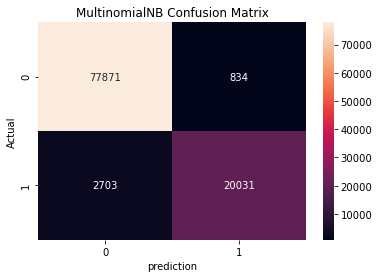

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    314192
           1       0.97      0.95      0.96     91564

    accuracy                           0.98    405756
   macro avg       0.98      0.97      0.97    405756
weighted avg       0.98      0.98      0.98    405756

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     78705
           1       0.96      0.88      0.92     22734

    accuracy                           0.97    101439
   macro avg       0.96      0.94      0.95    101439
weighted avg       0.97      0.97      0.96    101439



In [58]:
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

## Logistic Reg

/Users/qifanwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing accuracy   : 96.36333165744931 %
MSE [TEST]          : 0.03636668342550695
Training accuracy  : 97.73312039748025 %
MSE [TRAIN]         : 0.022668796025197408
precision :  0.963633316574493
recall    :  0.963633316574493
f1_score  :  0.963633316574493


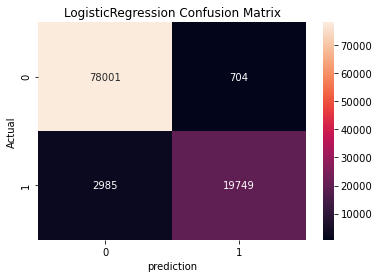

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    314192
           1       0.98      0.91      0.95     91564

    accuracy                           0.98    405756
   macro avg       0.98      0.95      0.97    405756
weighted avg       0.98      0.98      0.98    405756

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     78705
           1       0.97      0.87      0.91     22734

    accuracy                           0.96    101439
   macro avg       0.96      0.93      0.95    101439
weighted avg       0.96      0.96      0.96    101439



In [59]:
trained_clf_LogisticRegression = LogisticRegression().fit(x_train, y_train)
get_accuracy('LogisticRegression',trained_clf_LogisticRegression,x_train, y_train, x_test, y_test)

In [30]:
# trained_clf_random_forest = RandomForestClassifier().fit(x_train, y_train)
# get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)


## SVC

Testing accuracy   : 97.13916738138192 %
MSE [TEST]          : 0.02860832618618086
Training accuracy  : 99.96475714468794 %
MSE [TRAIN]         : 0.00035242855312059464
precision :  0.9713916738138192
recall    :  0.9713916738138192
f1_score  :  0.9713916738138192


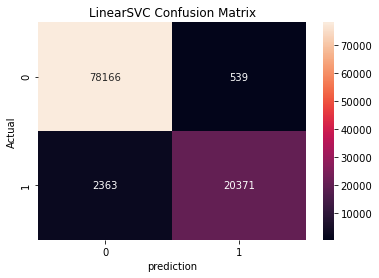

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314192
           1       1.00      1.00      1.00     91564

    accuracy                           1.00    405756
   macro avg       1.00      1.00      1.00    405756
weighted avg       1.00      1.00      1.00    405756

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     78705
           1       0.97      0.90      0.93     22734

    accuracy                           0.97    101439
   macro avg       0.97      0.94      0.96    101439
weighted avg       0.97      0.97      0.97    101439



In [60]:
from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)